In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [245]:
pdb_id = '1OPD'

# Input data: sanity check

In [246]:
rmsds = pd.read_csv(pdb_id + '.rmsd.csv', index_col=0)
rmsds[:3]

,fragment_size,group_count,max_templates,max_blast,matrix,rmsd
0,11,4,200,2000,PAM30,29.448881
1,5,8,50,500,BLOSUM62,24.286318
2,7,10,100,2000,BLOSUM62,27.771044


In [247]:
len(rmsds)

288

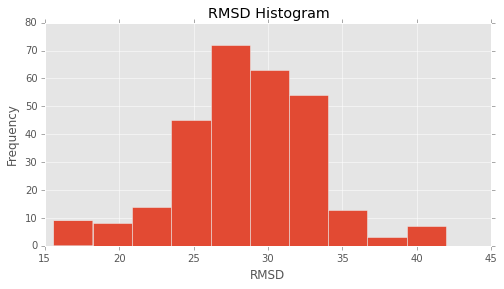

In [298]:
ax = rmsds.hist(column='rmsd', figsize=(8,4))[0][0]
_ = ax.set(ylabel="Frequency", xlabel="RMSD", title="RMSD Histogram")

In [250]:
#fig = plt.figure(figsize=(10,6))
#ax = fig.add_subplot(1, 1, 1)
#rmsds.hist(column='rmsd', by='group_count', ax=ax)

In [251]:
def line_plot(df, column, title=None):
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(1, 1, 1, xlabel="Experimento", ylabel="RMSD")
    for value in rmsds[column].unique():
        ax.plot(df[df[column] == value]['rmsd'], label=value)
    ax.legend()
    ax.set_title(title)
    fig.savefig(pdb_id + '.' + column + '.line.svg', format='svg')
    return ax

In [252]:
def scatter_plot(df, column, title):
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(1, 1, 1, xticks=rmsds[column].unique())
    df.plot(column, "rmsd", ax=ax, kind='scatter')
    ax.set(title=title, xlabel=title, ylabel='RMSD')
    fig.savefig(pdb_id + '.' + column +  '.scatter.svg', format='svg')
    return ax

In [275]:
def box_plot(df, column, title):
    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(1, 1, 1, ylabel="RMSD", xlabel=title)
    df.boxplot('rmsd', column, ax=ax, showmeans=True)
    ax.set(title=title, xlabel=title, ylabel='RMSD')
    fig.suptitle('')
    fig.savefig(pdb_id + '.' + column +  '.boxplot.svg', format='svg')
    return ax

# Fragment size

In [276]:
rmsds = rmsds.sort_values(by=['group_count', 'max_templates', 'max_blast', 'matrix', 'fragment_size'])
rmsds[:6]

,fragment_size,group_count,max_templates,max_blast,matrix,rmsd
116,5,4,50,500,BLOSUM62,33.556824
194,7,4,50,500,BLOSUM62,20.404449
104,9,4,50,500,BLOSUM62,26.297052
123,11,4,50,500,BLOSUM62,31.184532
28,5,4,50,500,PAM30,35.649433
4,7,4,50,500,PAM30,22.181728


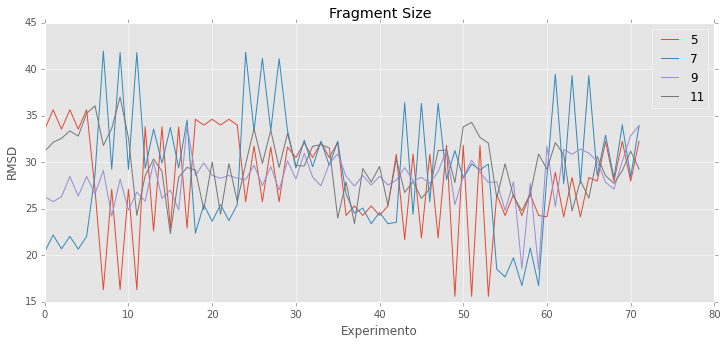

In [299]:
line_plot(rmsds, 'fragment_size', "Fragment Size")

/home/mchelem/dev/cref2/env/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


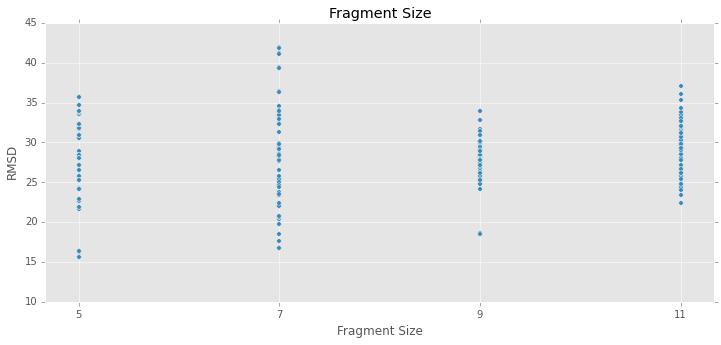

In [278]:
scatter_plot(rmsds, 'fragment_size', "Fragment Size")

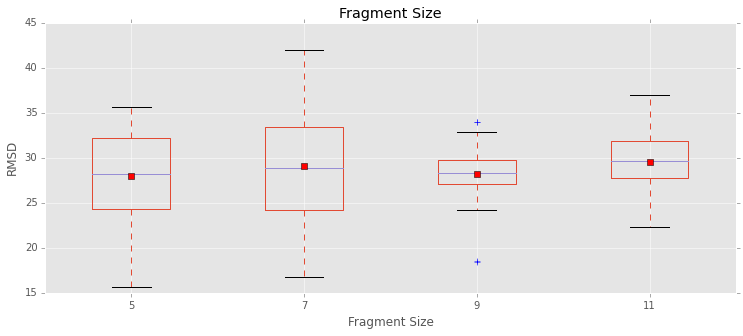

In [279]:
box_plot(rmsds, 'fragment_size', "Fragment Size")

# Number of groups

In [280]:
rmsds = rmsds.sort_values(by=['fragment_size', 'matrix', 'max_blast', 'max_templates', 'group_count'])
rmsds[:6]

,fragment_size,group_count,max_templates,max_blast,matrix,rmsd
116,5,4,50,500,BLOSUM62,33.556824
212,5,6,50,500,BLOSUM62,34.630268
1,5,8,50,500,BLOSUM62,24.286318
167,5,10,50,500,BLOSUM62,26.546434
276,5,4,100,500,BLOSUM62,27.109640
208,5,6,100,500,BLOSUM62,25.765680


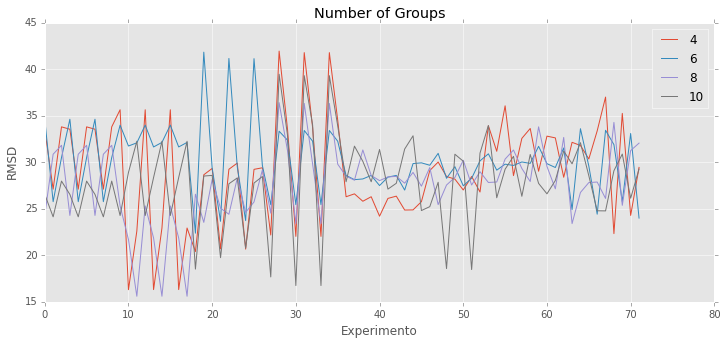

In [281]:
line_plot(rmsds, 'group_count', "Number of Groups")

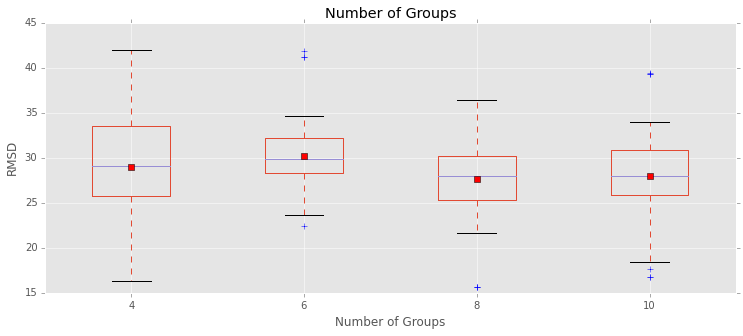

In [282]:
box_plot(rmsds, 'group_count', "Number of Groups")

# Number of templates

In [283]:
rmsds = rmsds.sort_values(by=['fragment_size', 'group_count', 'max_blast', 'matrix', 'max_templates'])
rmsds[:6]

,fragment_size,group_count,max_templates,max_blast,matrix,rmsd
116,5,4,50,500,BLOSUM62,33.556824
276,5,4,100,500,BLOSUM62,27.109640
10,5,4,200,500,BLOSUM62,33.810535
28,5,4,50,500,PAM30,35.649433
58,5,4,100,500,PAM30,16.302038
96,5,4,200,500,PAM30,22.605623


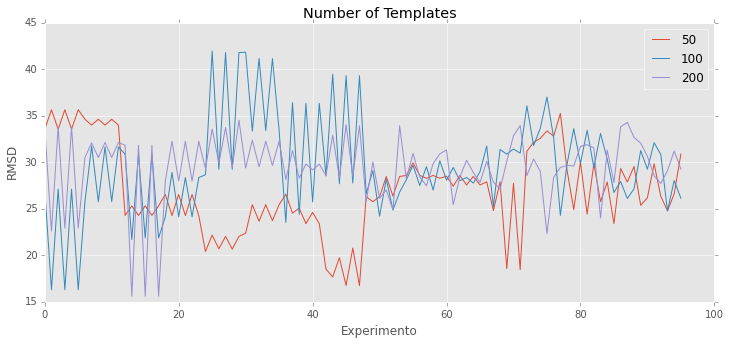

In [284]:
line_plot(rmsds, 'max_templates', "Number of Templates")

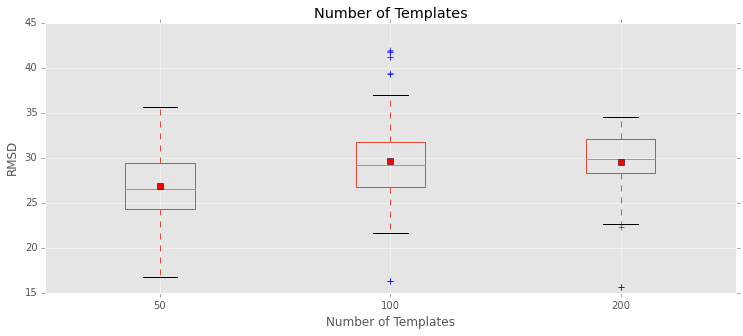

In [285]:
box_plot(rmsds, 'max_templates', "Number of Templates")

# Substitution Matrix

In [286]:
rmsds = rmsds.sort_values(by=['fragment_size', 'group_count', 'max_templates', 'max_blast', 'matrix'])
rmsds[:4]

,fragment_size,group_count,max_templates,max_blast,matrix,rmsd
116,5,4,50,500,BLOSUM62,33.556824
28,5,4,50,500,PAM30,35.649433
130,5,4,50,1000,BLOSUM62,33.556824
202,5,4,50,1000,PAM30,35.649433


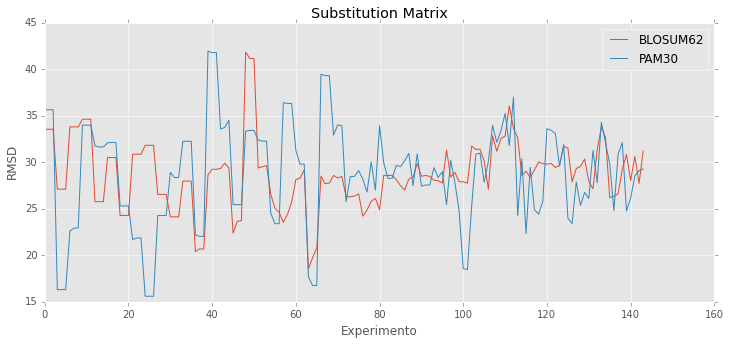

In [287]:
line_plot(rmsds, 'matrix', "Substitution Matrix")

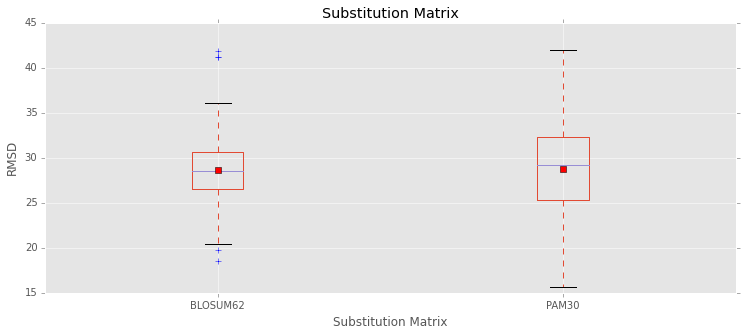

In [288]:
box_plot(rmsds, 'matrix', "Substitution Matrix")

# Crossing variables

/home/mchelem/dev/cref2/env/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


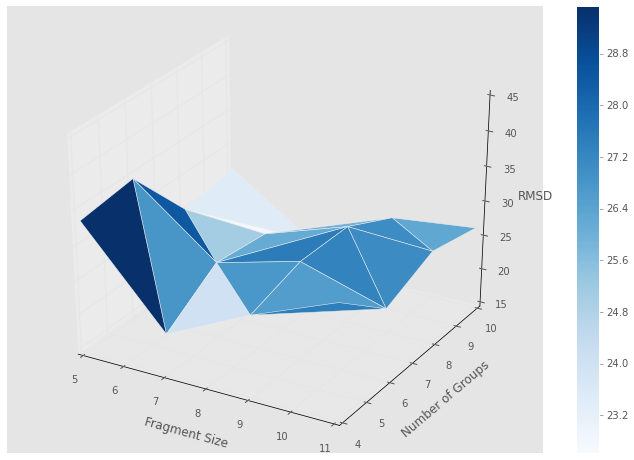

In [302]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d', xlabel="Fragment Size", ylabel="Number of Groups", zlabel="RMSD")
surf = ax.plot_trisurf(rmsds['fragment_size'], rmsds['group_count'], rmsds['rmsd'], cmap=cm.Blues)
fig.colorbar(surf)
